## Identitas
Nama : Fauzan Pradana
<br />
NIM : 2041720224
<br />
Absen : 10
<br />
Kelas : TI 3G

# Kuis 2 Machine Learning

## Studi Kasus
Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatn tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label #N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.


## Pertanyaan
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)
<br />
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data
tersebut! (5 poin)
<br />
3. Tentukan data validasi! (5 poin)
<br />
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi dengan wajib
melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang
dihasilkan! (20 poin)
<br />
5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada
tahun tertentu sebagai x dan jumlah luaran sebagai y) serta hitung akurasinya dengan
wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang
dihasilkan! (20 poin)
<br />
6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor
4! (15 poin)
<br />
7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan
metode Grid Search, Random Search, dan Exhausive Search! (20 poin)
<br />
8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal
satu visualisasi)! (10 poin)

### Import Library
Melakukan pengimportan library yang akan digunakan. Beberapa library yang digunakan adalah pandas, matplotlib, numpy, sklearn, dan seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

### Import Data
Data yang digunakan merupakan data volunteer pada suatu kelompok yang tersimpan pada data/dataset_kuis.xlsx

In [2]:
df = pd.read_excel('data/dataset_quiz.xlsx')

## Perkenalan Data
Perkenalan data dilakukan untuk proses mengetahui tentang data akan diproses. Data ini berupa dataframe yang telah di read sebelumnya dari dataset_quiz.xlsx

In [3]:
print(f'Jumlah Baris : {df.shape[0]}')
print(f'Jumlah Kolom : {df.shape[1]}')

Jumlah Baris : 85
Jumlah Kolom : 16


In [4]:
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [5]:
df.tail()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
80,8803.0,8804.0,9102.0,8005.0,9303.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,NaN,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
84,8102.0,7109.0,5903.0,7206.0,8903.0,NaN,TIDAK,0,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [6]:
print(f'Jumlah Kolom : {df.shape[0]}')
print(f'Jumlah Baris : {df.shape[1]}')
df.isnull().sum()

Jumlah Kolom : 85
Jumlah Baris : 16


id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

##### dari keterangan di atas, diketahui bahwa terdapat missing value sehingga perlu dilakukan penyesuaian

### Handling Missing Value

#### Drop kolom id_anggota5
karena record pada id_anggota5 memiliki nilai miss semua selain 1 record sehingga menurut saya lebih baik didrop

In [7]:
del df['id_anggota5']

In [8]:
del df['id_anggota4']

In [9]:
df

,id_ketua,id_anggota1,id_anggota2,id_anggota3,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


### Menghapus Row yang mengandung missing value

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(76, 14)

In [12]:
df.isna().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

## Data Visualisation
nb: Section ini berkaitan dengan soal **nomor 1**, yaitu
<br />
"Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)"
<br />

In [13]:
df

,id_ketua,id_anggota1,id_anggota2,id_anggota3,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,8805.0,7308.0,569.0,9106.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
80,8803.0,8804.0,9102.0,8005.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


### Line Chart

In [14]:
set(df['tahun'])

{2019, 2020, 2021, 2022}

In [15]:
tahun_2019 = df[df['tahun'] == 2019]
tahun_2019 = tahun_2019['jml_vltr_terlibat']
tahun_2019 = tahun_2019.sum()
tahun_2019

0

In [16]:
tahun_2020 = df[df['tahun'] == 2020]
tahun_2020 = tahun_2020['jml_vltr_terlibat']
tahun_2020 = tahun_2020.sum()
tahun_2020

39

In [17]:
tahun_2021 = df[df['tahun'] == 2021]
tahun_2021 = tahun_2021['jml_vltr_terlibat']
tahun_2021 = tahun_2021.sum()
tahun_2021

26

In [18]:
tahun_2022 = df[df['tahun'] == 2022]
tahun_2022 = tahun_2022['jml_vltr_terlibat']
tahun_2022 = tahun_2022.sum()
tahun_2022

41

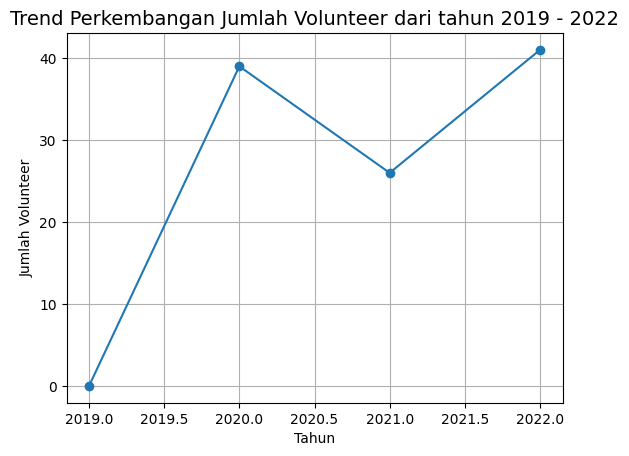

In [19]:
plt.plot([2019, 2020, 2021, 2022], [tahun_2019, tahun_2020, tahun_2021, tahun_2022], marker='o')
plt.grid(True)
plt.title('Trend Perkembangan Jumlah Volunteer dari tahun 2019 - 2022', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunteer')
plt.show()

### Bar Chart Vertical Berganda

In [20]:
jumlah_luaranhki_2019 = len(df[(df['luaran_hki'] == 'ADA') & (df['tahun'] == 2019)])
jumlah_luaranhki_2020 = len(df[(df['luaran_hki'] == 'ADA') & (df['tahun'] == 2020)])
jumlah_luaranhki_2021 = len(df[(df['luaran_hki'] == 'ADA') & (df['tahun'] == 2021)])
jumlah_luaranhki_2022 = len(df[(df['luaran_hki'] == 'ADA') & (df['tahun'] == 2022)])

In [21]:
jumlah_luaranlain_2019 = len(df[(df['luaran_lain'] == 'YA') & (df['tahun'] == 2019)])
jumlah_luaranlain_2020 = len(df[(df['luaran_lain'] == 'YA') & (df['tahun'] == 2020)])
jumlah_luaranlain_2021 = len(df[(df['luaran_lain'] == 'YA') & (df['tahun'] == 2021)])
jumlah_luaranlain_2022 = len(df[(df['luaran_lain'] == 'YA') & (df['tahun'] == 2022)])

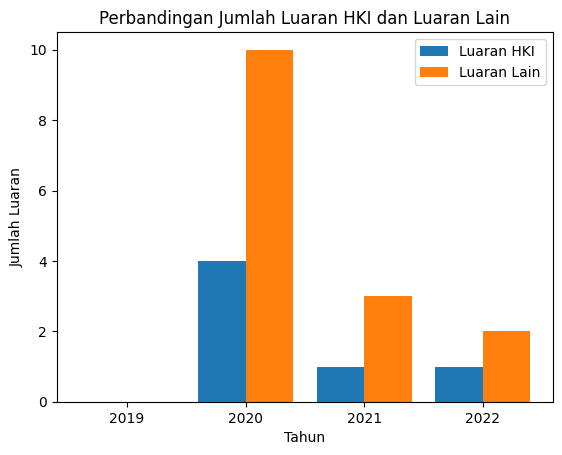

In [22]:
X = ['2019','2020','2021','2022']
hki = [jumlah_luaranhki_2019, jumlah_luaranhki_2020, jumlah_luaranhki_2021, jumlah_luaranhki_2022]
lain = [jumlah_luaranlain_2019, jumlah_luaranlain_2020, jumlah_luaranlain_2021, jumlah_luaranlain_2022]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, hki, 0.4, label = 'Luaran HKI')
plt.bar(X_axis + 0.2, lain, 0.4, label = 'Luaran Lain')
  
plt.xticks(X_axis, X)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Luaran")
plt.title("Perbandingan Jumlah Luaran HKI dan Luaran Lain")
plt.legend()
plt.show()

### Pie Chart

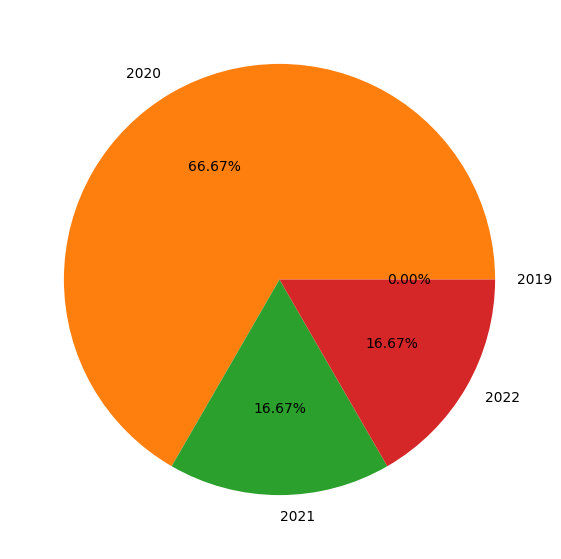

In [23]:
tahun = ['2019', '2020', '2021', '2022']
 
data = [jumlah_luaranhki_2019, jumlah_luaranhki_2020, jumlah_luaranhki_2021, jumlah_luaranhki_2022]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = tahun, autopct='%1.2f%%')
 
# show plot
plt.show()

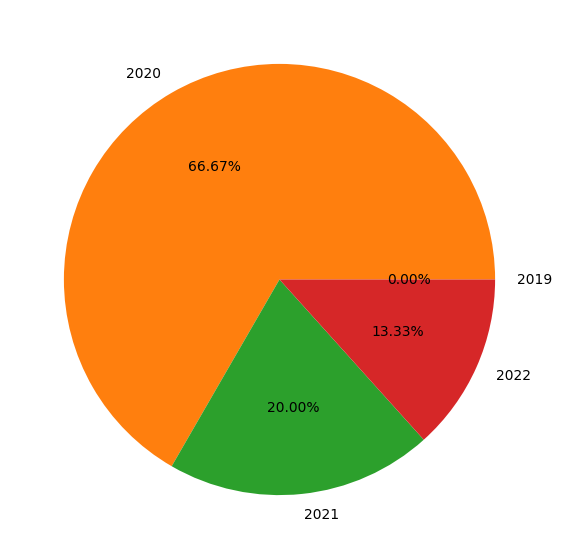

In [24]:
tahun = ['2019', '2020', '2021', '2022']
 
data = [jumlah_luaranlain_2019, jumlah_luaranlain_2020, jumlah_luaranlain_2021, jumlah_luaranlain_2022]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = tahun, autopct='%1.2f%%')
 
# show plot
plt.show()

### Single Vertical Bar Chart

In [25]:
set(df['skema'])

{'KEMITRAAN', 'REGULER'}

In [26]:
jumlah_luaran_kemitraan = len(df[(df['luaran_hki'] == 'ADA') & (df['skema'] == 'KEMITRAAN')]) + len(df[(df['luaran_lain'] == 'YA') & (df['skema'] == 'KEMITRAAN')])
jumlah_luaran_reguler = len(df[(df['luaran_hki'] == 'ADA') & (df['skema'] == 'REGULER')]) + len(df[(df['luaran_lain'] == 'YA') & (df['skema'] == 'REGULER')])

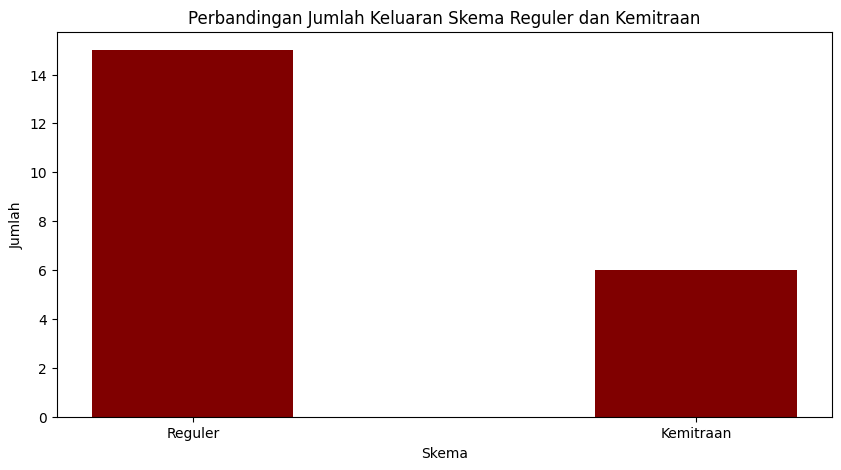

In [27]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['Reguler', 'Kemitraan'], [jumlah_luaran_reguler, jumlah_luaran_kemitraan], color ='maroon',
        width = 0.4)
 
plt.xlabel("Skema")
plt.ylabel("Jumlah")
plt.title("Perbandingan Jumlah Keluaran Skema Reguler dan Kemitraan")
plt.show()

In [28]:
ketua_ls = df['id_ketua'].unique().tolist()

ketua = []

for kl in ketua_ls:
    ketua.append(len(df[df['id_ketua'] == kl]))

ketua_df = pd.DataFrame()
ketua_df['ketua_id'] = ketua_ls
ketua_df['jumlah'] = ketua

ketua_top_df_10 = ketua_df[['ketua_id', 'jumlah']].sort_values(by='jumlah', ascending=False).head(n=10).reset_index(drop=True)
ketua_top_df_5 = ketua_df[['ketua_id', 'jumlah']].sort_values(by='jumlah', ascending=False).head(n=5).reset_index(drop=True)

ketua_top_df_5

,ketua_id,jumlah
0,8402.0,6
1,7214.0,4
2,5911.0,4
3,8201.0,4
4,8008.0,4


### Horizontal Bar Chart

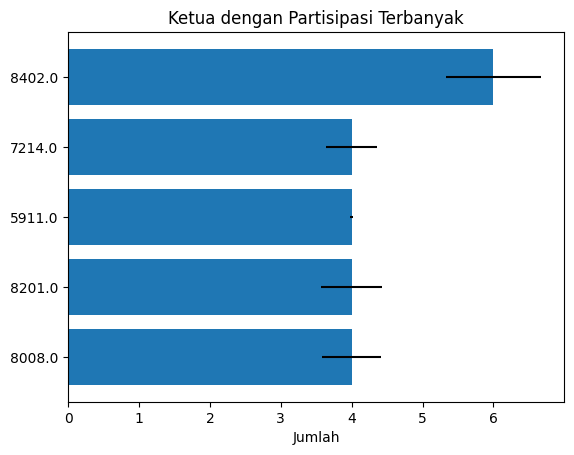

In [29]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ketua_top_df_5['ketua_id']
y_pos = np.arange(len(people))
performance = ketua_top_df_5['jumlah']
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()
ax.set_xlabel('Jumlah')
ax.set_title('Ketua dengan Partisipasi Terbanyak')

plt.show()

### Circle Diagram

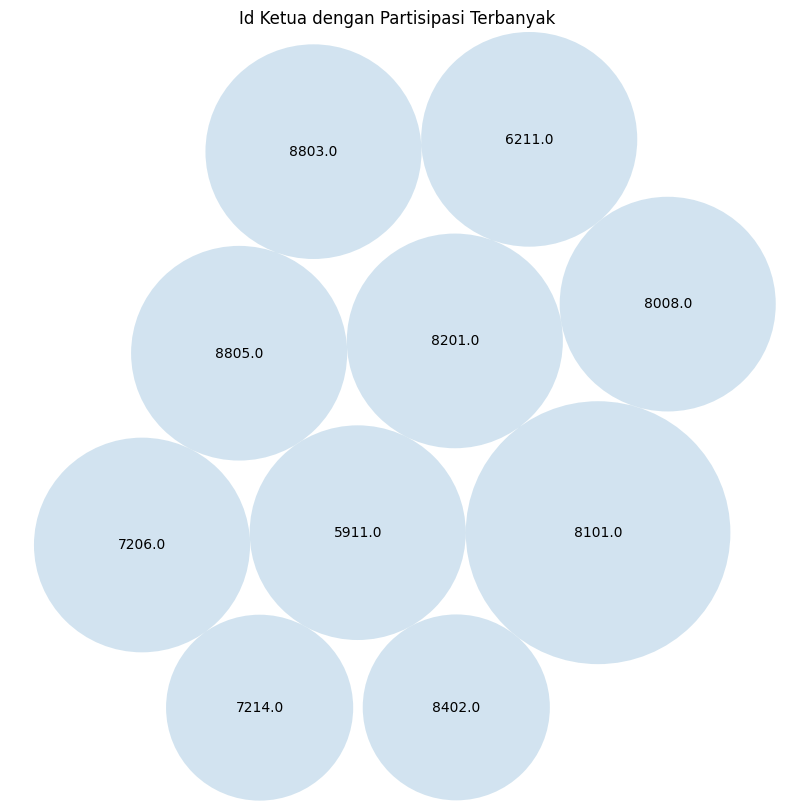

In [30]:
from pprint import pprint as pp
import circlify as circ

circles = circ.circlify(
    ketua_top_df_10['jumlah'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circ.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Id Ketua dengan Partisipasi Terbanyak')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = ketua_top_df_10["ketua_id"]

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
          label, 
          (x,y) ,
          va='center',
          ha='center'
     )

### Pemilihan Data Training dan Testing 
Merupakan jawaban pada soal nomor 2, yaitu
**"Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)"**

In [31]:
df

,id_ketua,id_anggota1,id_anggota2,id_anggota3,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,8805.0,7308.0,569.0,9106.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
80,8803.0,8804.0,9102.0,8005.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [32]:
df = df.iloc[:, 4:]
df

,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...
78,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
80,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [33]:
# Menggunakan LabelEncoder untuk mengkonversi nilai posisi menjadi urutan 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df['keterlibatan_vltr'] = labelencoder.fit_transform(df['keterlibatan_vltr'])
df['skema'] = labelencoder.fit_transform(df['skema'])
df['luaran_hki'] = labelencoder.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = labelencoder.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = labelencoder.fit_transform(df['potensi_hki'])
df['luaran_lain'] = labelencoder.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain'] = labelencoder.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = labelencoder.fit_transform(df['status_luaran_lain'])

In [34]:
set(df['potensi_hki'])

{0, 1, 2, 3}

In [35]:
y = df['potensi_hki']
X = df.iloc[:, df.columns != 'potensi_hki']

In [36]:
y

0     2
1     2
2     2
3     2
4     2
     ..
78    2
80    2
81    2
83    2
84    2
Name: potensi_hki, Length: 76, dtype: int64

In [37]:
X

,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,0,0,2019,1,1,1,0,3,1
1,0,0,2019,1,1,1,0,3,1
2,0,0,2019,1,1,1,0,3,1
3,0,0,2019,1,1,1,0,3,1
4,0,0,2019,1,1,1,0,3,1
...,...,...,...,...,...,...,...,...,...
78,1,3,2022,1,1,1,0,3,1
80,1,3,2022,1,1,1,0,3,1
81,1,3,2022,1,1,1,0,3,1
83,1,3,2022,1,1,1,0,3,1


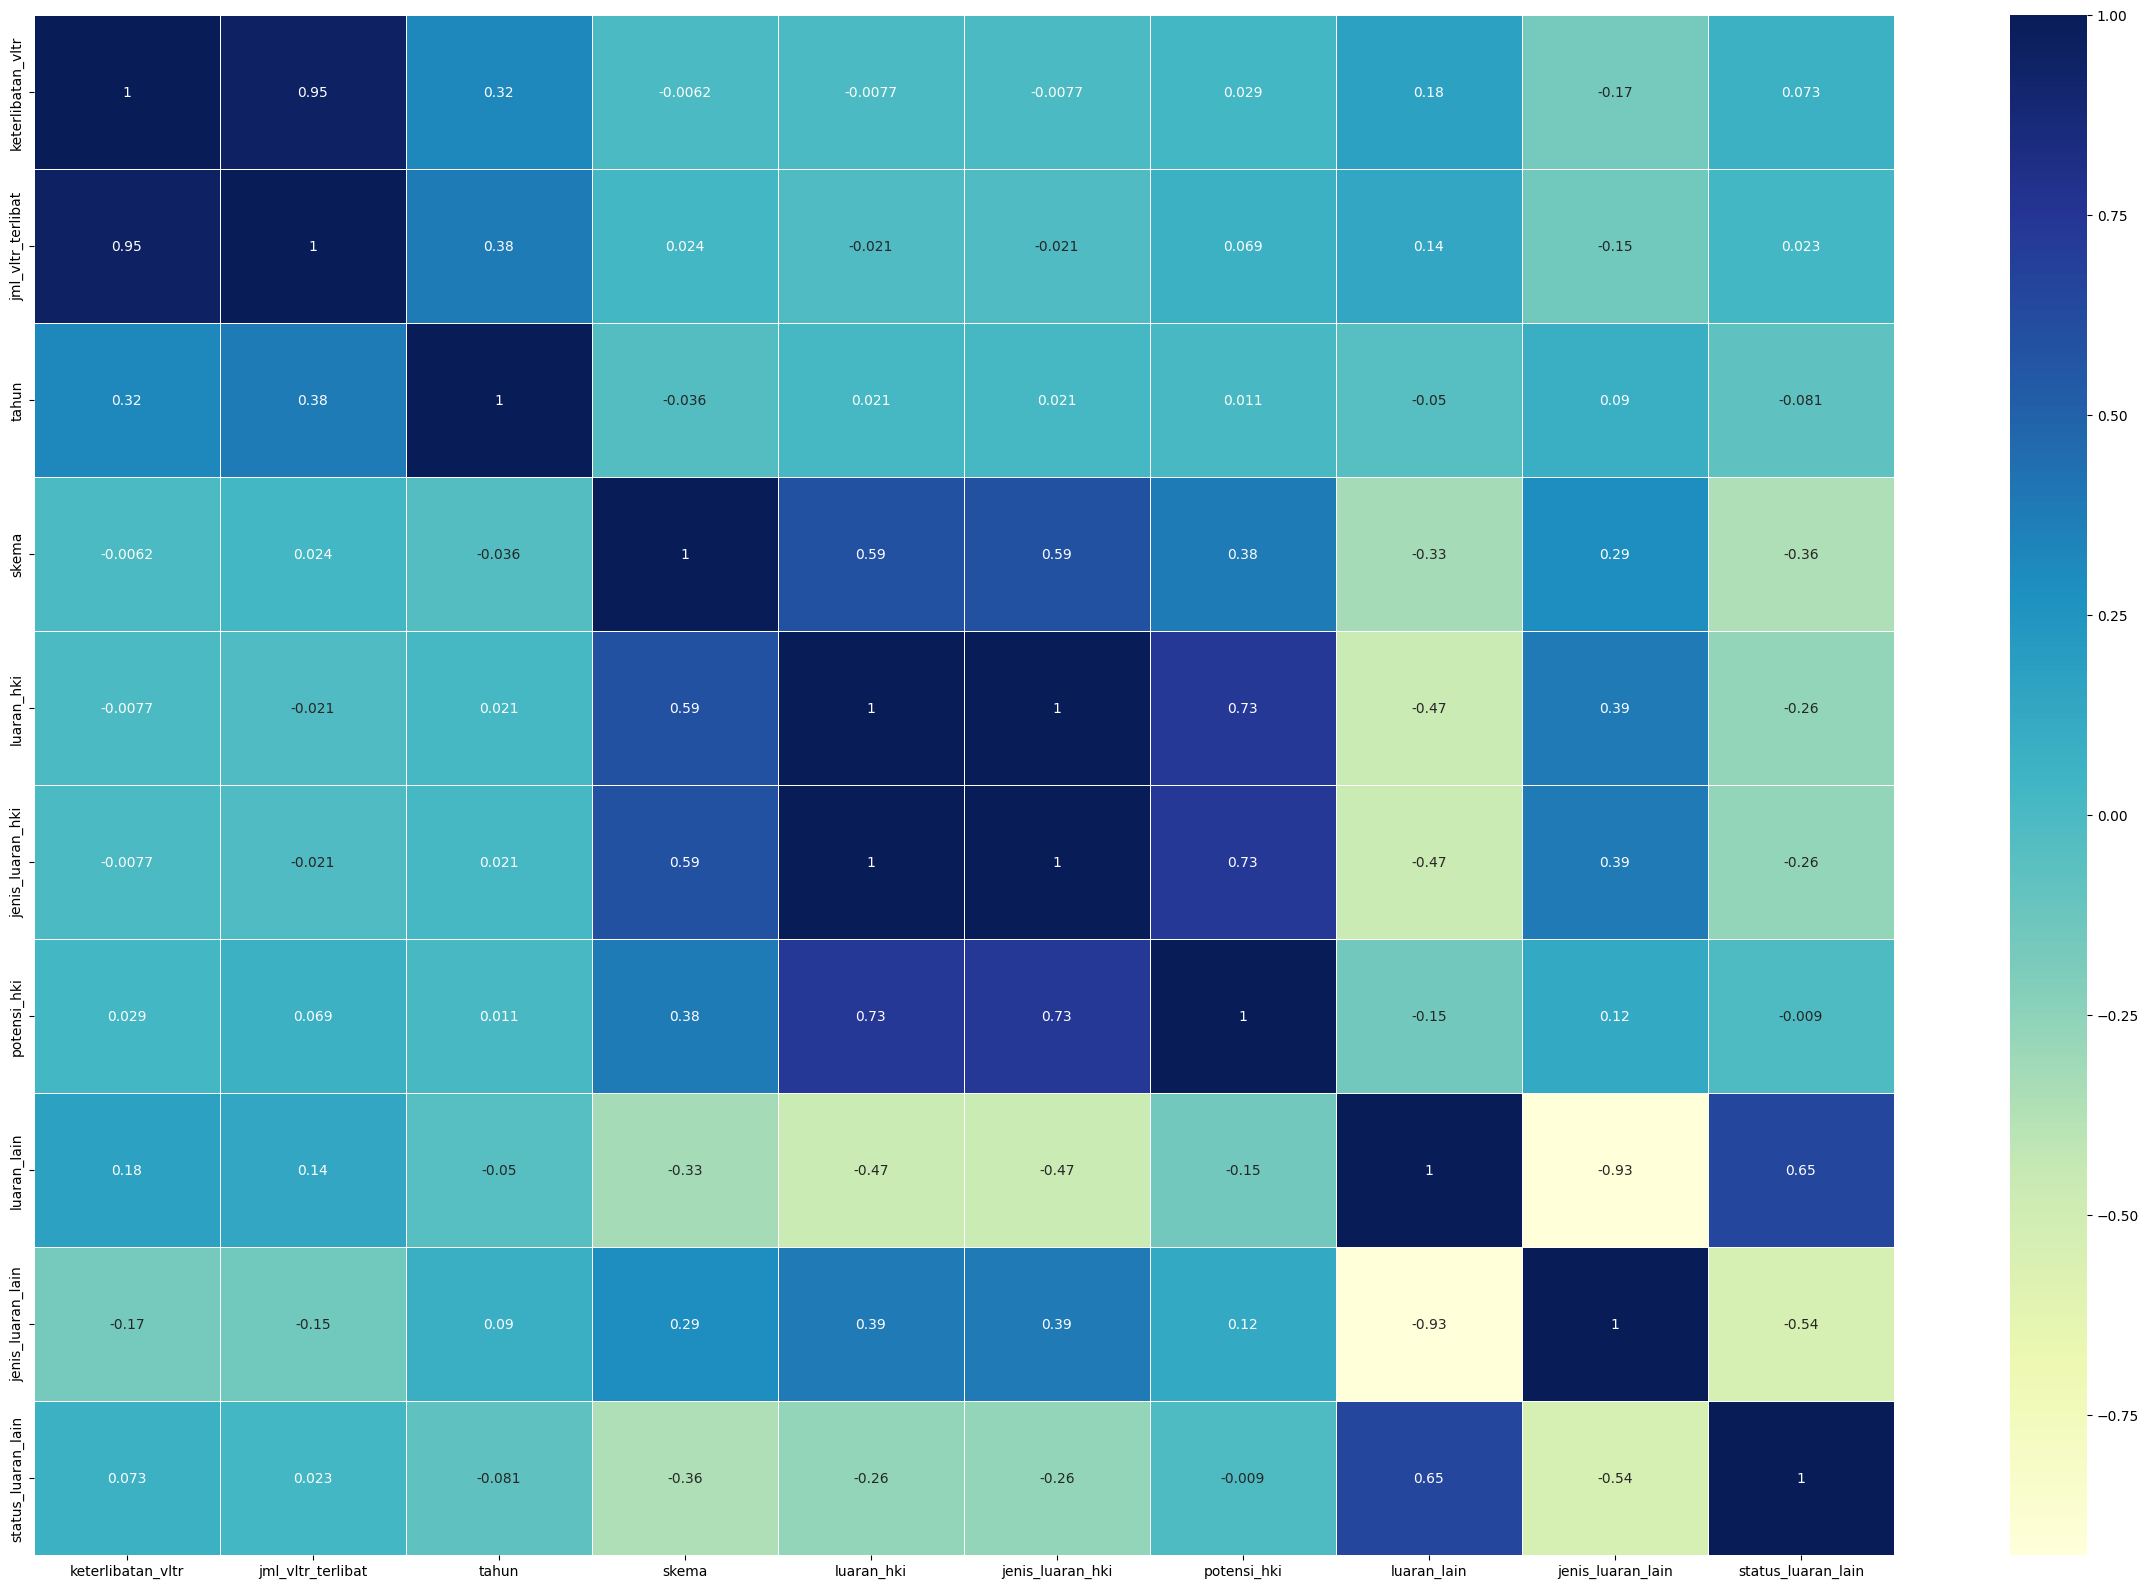

In [38]:
fig, ax = plt.subplots(figsize=(30,20)) 

sns.heatmap(df.corr(), cmap='YlGnBu', annot = True, linewidths=.7, ax=ax)
plt.show()

### Pemilihan Data Training dan Testing

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Validasi
Sesuai dengan **soal nomor 3**, yaitu membuat data validasi

In [40]:
# Implementasi repeated k-fold cross validation data training, validasi, dan testing dengan stratified
from sklearn.model_selection import train_test_split, RepeatedKFold

# Split train test dengan stratified
# Rasio 8:2
df_train, df_test = train_test_split(df, test_size=0.8, random_state=42, stratify=df['status_luaran_lain'])

# inisiasi obyek RepeatedKFold
# dengan data df_train
rkf = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42) # n_repeats digunakan untuk mendefinisikan berapa kali ulangan
print(f'Jumlah fold: {rkf.get_n_splits()}')
print(f'Obyek SKFold: {rkf}')

# Nomor 3 (Splitting Data Training Menjadi Data Training dan Validation)
# Lakukan splitting dengan RKFold
# parameter kedua dari split adalah labelnya
# Split train menjadi train dan validasi
rkf_split2 = rkf.split(df_train, df_train['status_luaran_lain'])
print(f'Jumlah data df: {df_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in rkf_split2:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 12
Obyek SKFold: RepeatedKFold(n_repeats=3, n_splits=4, random_state=42)
Jumlah data df: 15
Index train: [ 1  2  3  4  5  6  7  8 10 12 14] | Index test: [ 0  9 11 13]
Index train: [ 0  3  4  6  7  9 10 11 12 13 14] | Index test: [1 2 5 8]
Index train: [ 0  1  2  3  5  6  8  9 11 12 13] | Index test: [ 4  7 10 14]
Index train: [ 0  1  2  4  5  7  8  9 10 11 13 14] | Index test: [ 3  6 12]
Index train: [ 1  2  3  4  5  6  7  9 11 13 14] | Index test: [ 0  8 10 12]
Index train: [ 0  1  2  4  5  7  8 10 12 13 14] | Index test: [ 3  6  9 11]
Index train: [ 0  2  3  6  7  8  9 10 11 12 14] | Index test: [ 1  4  5 13]
Index train: [ 0  1  3  4  5  6  8  9 10 11 12 13] | Index test: [ 2  7 14]
Index train: [ 0  2  3  5  6  7  8  9 11 13 14] | Index test: [ 1  4 10 12]
Index train: [ 0  1  2  4  5  8  9 10 11 12 14] | Index test: [ 3  6  7 13]
Index train: [ 1  3  4  5  6  7  9 10 11 12 13] | Index test: [ 0  2  8 14]
Index train: [ 0  1  2  3  4  6  7  8 10 12 13 14] | Index test

## Clasification
Sesuai dengan soal nomor 4, yaitu **Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)** 
<br />
Metode yang digunakan adalah Decision Tree dan SVC

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score

# DT ENTROPY
dt_entropy = DecisionTreeClassifier(criterion='entropy')

# Fit Model
dt_entropy.fit(X_train, y_train)

# Memprediksi label set test
y_pred_entropy = dt_entropy.predict(X_test)

# Evaluasi
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print(f'Akurasi DT Entropy: {acc_entropy}')

# SVC
svc =  SVC(kernel="linear", C=10, probability=True)

# Fit Model
svc.fit(X_train, y_train)

# Memprediksi label set test
y_pred_svc = svc.predict(X_test)

# Evaluasi
acc_svc = accuracy_score(y_test, y_pred_svc)
print(f'Akurasi SVC: {acc_svc}')

Akurasi DT Entropy: 1.0
Akurasi SVC: 0.9375


## Prediction
Merupakan jawaban pada soal nomor 5 **Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)**
<br />
Prediksi yang saya lakukan adalah dengan memprediksi potensi HKI berdasarkan beberapa parameter yang telah ditentukan

In [42]:
luaran_2019 = len(df[(df['luaran_hki'] == 0) & (df['tahun'] == 2019)]) + len(df[(df['luaran_lain'] == 1) & (df['tahun'] == 2019)]) 
luaran_2020 = len(df[(df['luaran_hki'] == 0) & (df['tahun'] == 2020)]) + len(df[(df['luaran_lain'] == 1) & (df['tahun'] == 2020)]) 
luaran_2021 = len(df[(df['luaran_hki'] == 0) & (df['tahun'] == 2021)]) + len(df[(df['luaran_lain'] == 1) & (df['tahun'] == 2021)]) 
luaran_2022 = len(df[(df['luaran_hki'] == 0) & (df['tahun'] == 2022)]) + len(df[(df['luaran_lain'] == 1) & (df['tahun'] == 2022)]) 

In [43]:
status_luran_lain_2019 = len(df[(df['status_luaran_lain'] != 1) & (df['tahun'] == 2019)])
status_luran_lain_2020 = len(df[(df['status_luaran_lain'] != 1) & (df['tahun'] == 2020)])
status_luran_lain_2021 = len(df[(df['status_luaran_lain'] != 1) & (df['tahun'] == 2021)])
status_luran_lain_2022 = len(df[(df['status_luaran_lain'] != 1) & (df['tahun'] == 2022)])

In [44]:
potensi_hki_2019 = len(df[(df['potensi_hki'] != 2) & (df['tahun'] == 2019)])
potensi_hki_2020 = len(df[(df['potensi_hki'] != 2) & (df['tahun'] == 2020)])
potensi_hki_2021 = len(df[(df['potensi_hki'] != 2) & (df['tahun'] == 2021)])
potensi_hki_2022 = len(df[(df['potensi_hki'] != 2) & (df['tahun'] == 2022)])

### Prediksi Menggunakan Jumlah Volunteer Terlibat dan luaran-luaran

In [45]:
df_baru_1 = pd.DataFrame(list())
df_baru_1['jumlah_vltr_terlibat'] = [tahun_2019, tahun_2020, tahun_2021, tahun_2022]
df_baru_1['tahun'] = [2019, 2020, 2021, 2022]
df_baru_1['luaran'] = [luaran_2019, luaran_2020, luaran_2021, luaran_2022]
df_baru_1['status_luaran_lain'] = [status_luran_lain_2019, status_luran_lain_2020, status_luran_lain_2021, status_luran_lain_2022]
df_baru_1['potensi_hki'] = [potensi_hki_2019, potensi_hki_2020, potensi_hki_2021, potensi_hki_2022]
df_baru_1

,jumlah_vltr_terlibat,tahun,luaran,status_luaran_lain,potensi_hki
0,0,2019,0,0,0
1,39,2020,14,9,9
2,26,2021,4,3,3
3,41,2022,3,2,2


In [47]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

Xr = df_baru_1[['status_luaran_lain', 'potensi_hki', 'jumlah_vltr_terlibat']]
yr = df_baru_1['potensi_hki']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.5, random_state=2)

regressor = RandomForestRegressor(n_estimators = 1000, random_state = 72)
regressor.fit(Xr_train, yr_train)

yr_pred = regressor.predict(Xr_test)

# Evaluasi
# Calculate the absolute errors
errors = abs(yr_pred - yr_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yr_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 50.37 %.


### Prediksi Menggunakan Luaran-Luaran yang Memiliki Keterhubungan Tinggi

In [48]:
df_baru = pd.DataFrame(list())
df_baru['tahun'] = [2019, 2020, 2021, 2022]
df_baru['luaran'] = [luaran_2019, luaran_2020, luaran_2021, luaran_2022]
df_baru['status_luaran_lain'] = [status_luran_lain_2019, status_luran_lain_2020, status_luran_lain_2021, status_luran_lain_2022]
df_baru['potensi_hki'] = [potensi_hki_2019, potensi_hki_2020, potensi_hki_2021, potensi_hki_2022]
df_baru

,tahun,luaran,status_luaran_lain,potensi_hki
0,2019,0,0,0
1,2020,14,9,9
2,2021,4,3,3
3,2022,3,2,2


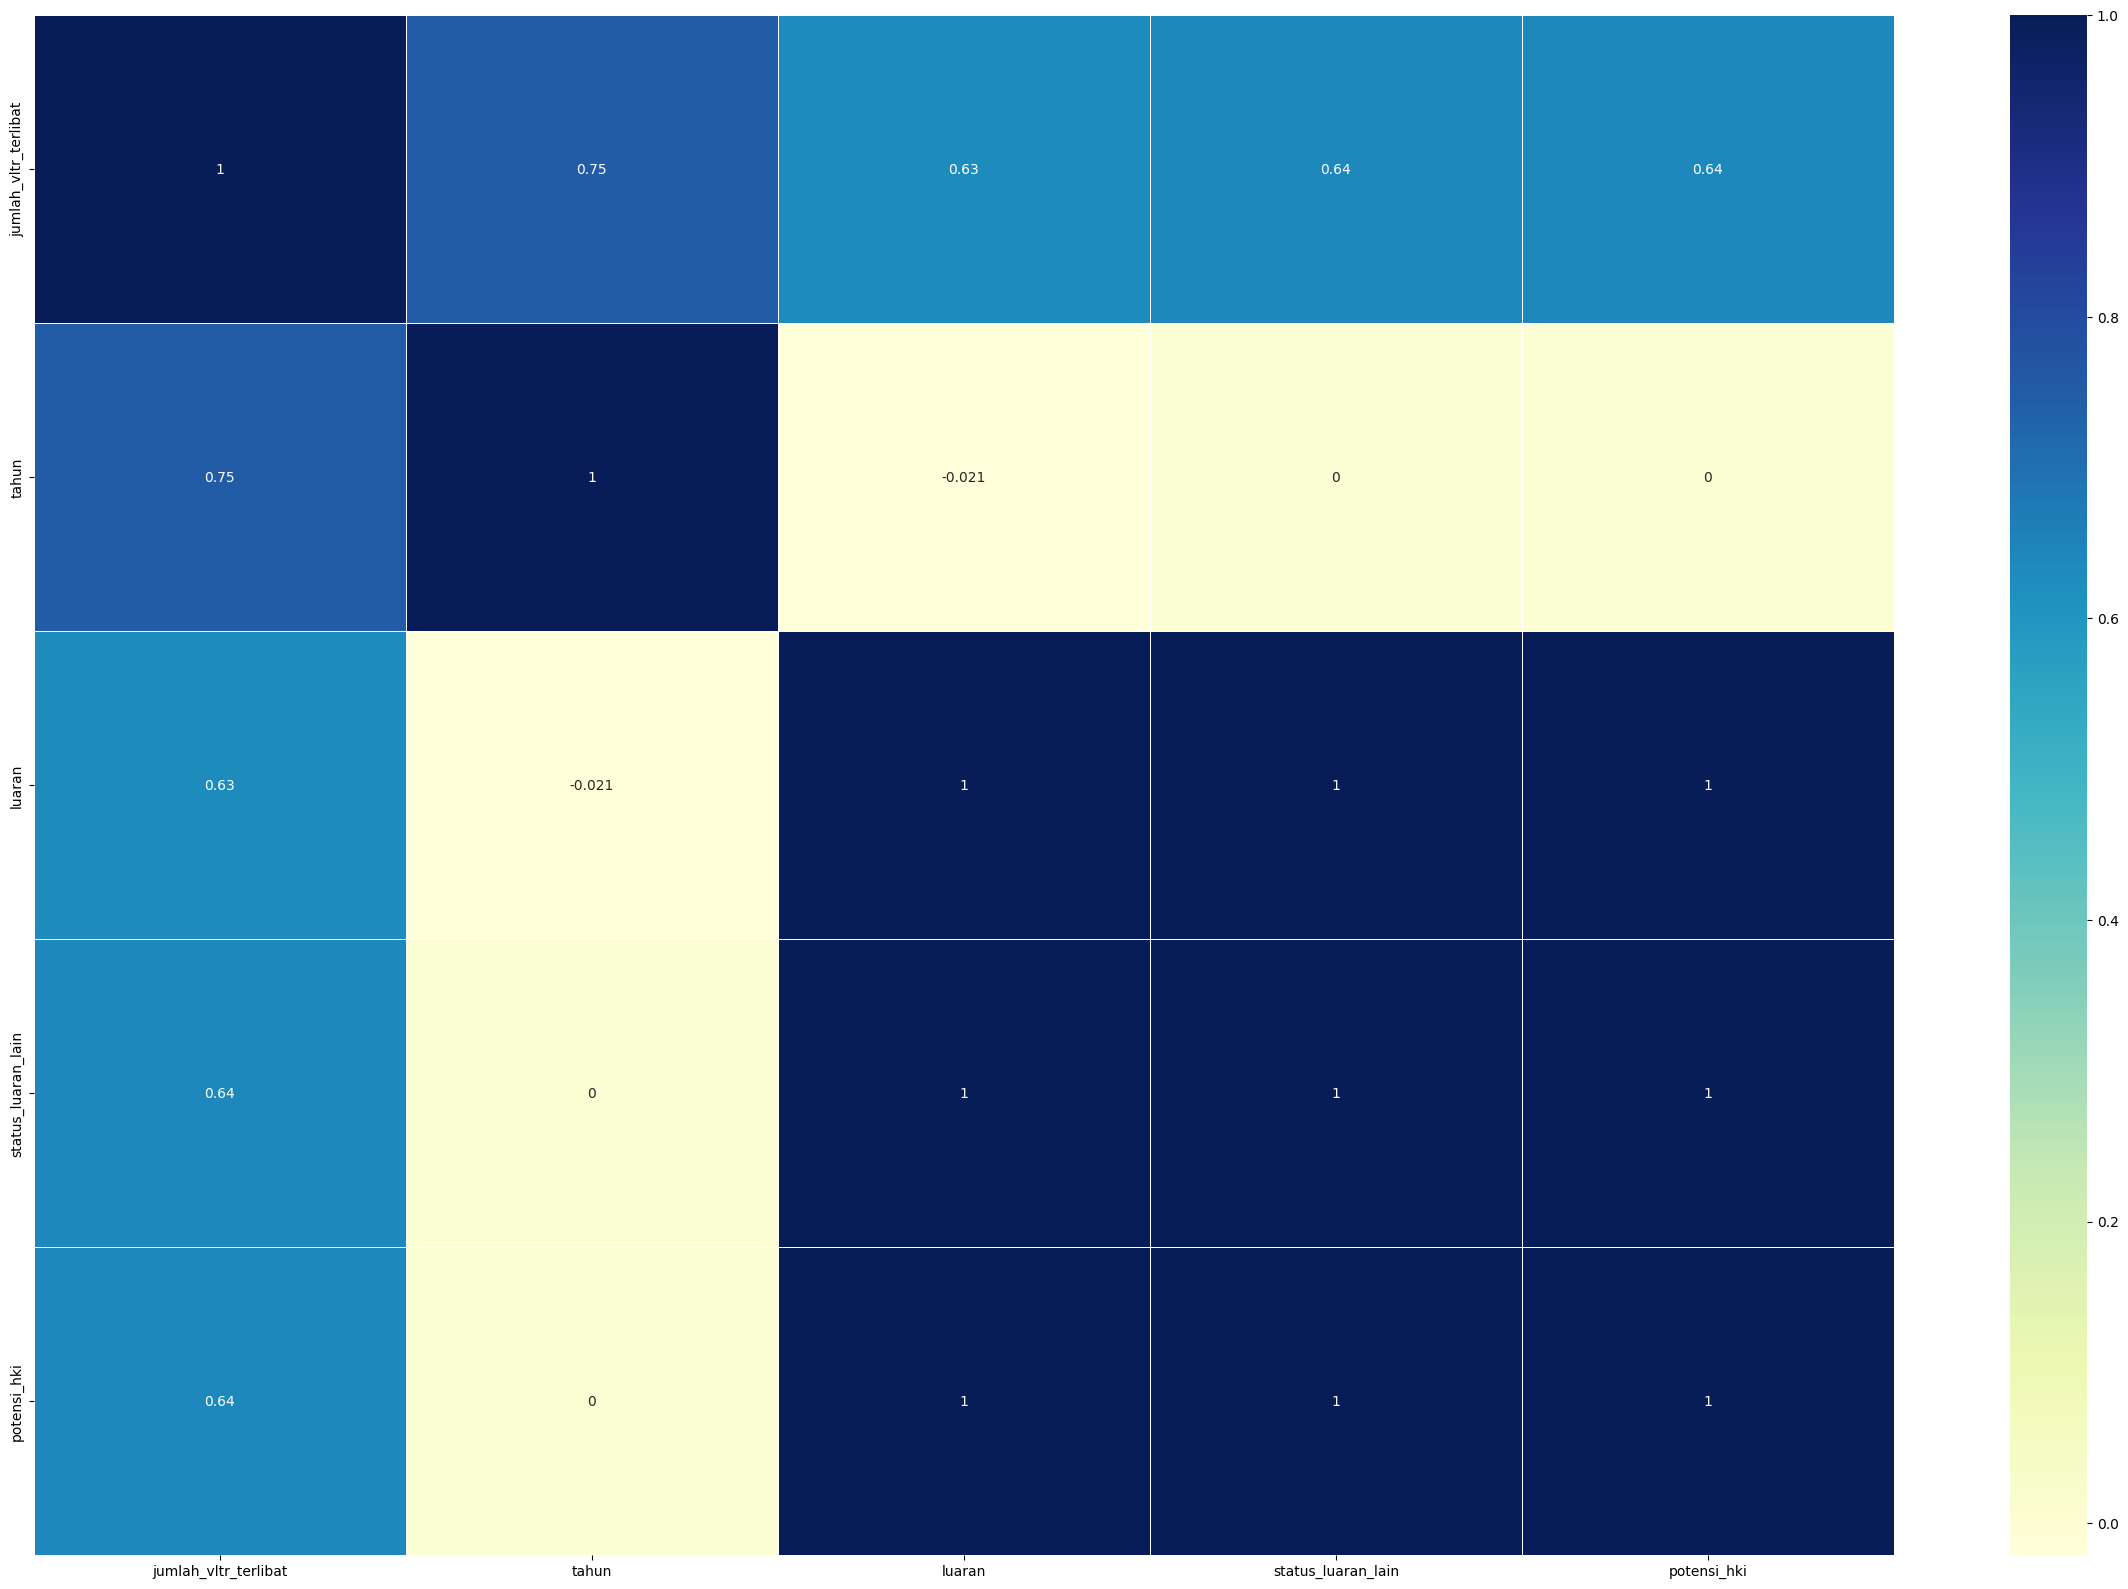

In [47]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(df_baru.corr(), cmap='YlGnBu', annot = True, linewidths=.7, ax=ax)
plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

Xr = df_baru[['status_luaran_lain', 'potensi_hki']]
yr = df_baru['potensi_hki']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.5, random_state=2)

regressor = RandomForestRegressor(n_estimators = 1000, random_state = 72)
regressor.fit(Xr_train, yr_train)

yr_pred = regressor.predict(Xr_test)

# Evaluasi
# Calculate the absolute errors
errors = abs(yr_pred - yr_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yr_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.92 %.


### Kesimpulan
Dari hasil di atas, diketahui bahwa akurasi ketika menggunakan nilai Xr berupa luaran yang memiliki keterhubungan lebih tinggi memiliki nilai akurasi yang lebih tinggi

## Confusion Matrix dan ROC
Sesuai dengan soal nomor 6, yaitu **Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)**

Confusion Matrix DT :  [[ 1  0]
 [ 0 15]]
Confusion Matrix SVC :  [[ 1  0  0]
 [ 0 14  1]
 [ 0  0  0]]
[2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 1 3 2 2 2 2 2]
ROC DT :  1.0
ROC SVC :  1.0
Confusion Matrix DT


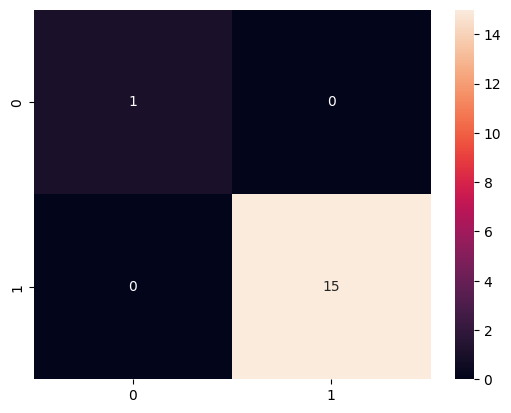

Confusion Matrix SVC


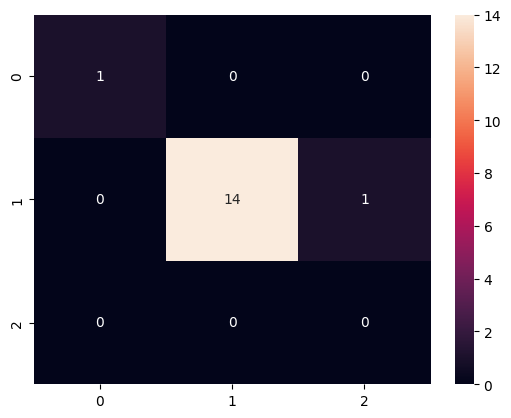

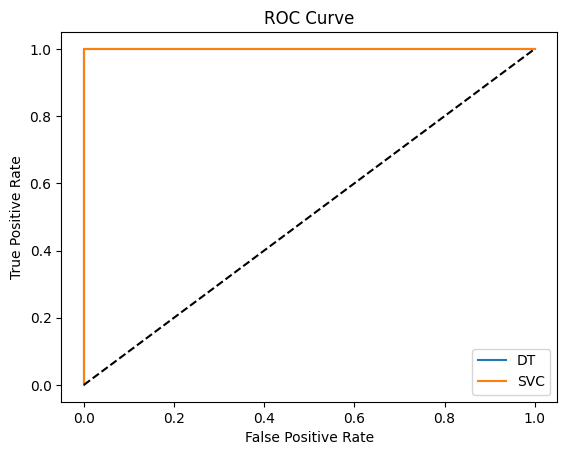

In [49]:
# Memprediksi label set test probabilitas untuk ROC AUC
y_predprob_entropy = dt_entropy.predict_proba(X_test)

y_predprob_svc = svc.predict_proba(X_test)

# Membuat Confusion Matrix dan ROC AUC dari KNN dan Random Forest
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix
print('Confusion Matrix DT : ',confusion_matrix(y_test, y_pred_entropy))
print('Confusion Matrix SVC : ',confusion_matrix(y_test, y_pred_svc))

print(y_pred_entropy)
print(y_pred_svc)

# ROC
print('ROC DT : ',roc_auc_score(y_test, y_pred_entropy))
print('ROC SVC : ',roc_auc_score(y_test, y_pred_svc))


# # Membuat Visualisasi Confusion Matrix dan ROC

# Confusion Matrix
print('Confusion Matrix DT')
cm = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(cm, annot=True)
plt.show()

print('Confusion Matrix SVC')
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True)
plt.show()


# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_entropy, pos_label=2)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_svc, pos_label=2)
plt.plot(fpr, tpr, label='DT')
plt.plot(fpr2, tpr2, label='SVC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Hyperparameter tunning
Soal nomor 7 : **Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search!**

In [50]:
# RANDOM SEARCH
from sklearn.model_selection import RandomizedSearchCV

# inisiasi model
dt = DecisionTreeClassifier()

# Definisikan hyperparameter yang akan digunakan
# sklearn menerima dalam bentuk dictionary
# nama hyperparamater HARUS SESUAI dengan dokumentasi sklearn
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5, 11)),
}

# inisiasi rs berdasarkan nilai repeated k-fold dan hyperparameter
rs = RandomizedSearchCV(dt, param_distributions=params,
                        scoring="accuracy",
                        n_jobs=-1, cv=rkf, return_train_score=True)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
%timeit rs.fit(X, y)

# Evaluasi dengan score
score = rs.score(X, y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {rs.best_params_}')

104 ms ± 5.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.9342105263157895
Konfigurasi hyperparameter: {'max_depth': 5, 'criterion': 'entropy'}


In [51]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV 

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5, 11)),
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
rs = GridSearchCV(dt, param_grid=params, cv=rkf, scoring="accuracy",
                        n_jobs=-1, return_train_score=True)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit rs.fit(X, y)

# Evaluasi dengan score
score = rs.score(X, y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {rs.best_params_}')

177 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Hasil evaluasi: 0.9342105263157895
Konfigurasi hyperparameter: {'criterion': 'entropy', 'max_depth': 5}


In [187]:
# RANDOM SEARCH
model = SVC()

params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'C': [1, 10, 100]
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
rs = RandomizedSearchCV(model, param_distributions=params, cv=rkf, 
                          n_iter=10, scoring="accuracy", n_jobs=-1, return_train_score=True)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit rs.fit(X, y)

# Evaluasi dengan score
score = rs.score(X, y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {rs.best_params_}')

126 ms ± 4.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Hasil evaluasi: 0.8947368421052632
Konfigurasi hyperparameter: {'kernel': 'linear', 'degree': 2, 'C': 1}


In [188]:
# GRID SEARCH
params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'C': [1, 10, 100]
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(model, param_grid=params, cv=rkf)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit grid.fit(X, y)

# Evaluasi dengan score
score = grid.score(X, y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

706 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.8947368421052632
Konfigurasi hyperparameter: {'C': 1, 'degree': 2, 'kernel': 'linear'}


## Visualisasi
Soal Nomor 8 : **Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)**

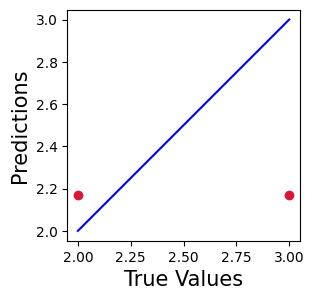

3
2


In [189]:
plt.figure(figsize=(3,3))
plt.scatter(yr_test, yr_pred, c='crimson') 

p1 = max(max(yr_pred), max(yr_test))
p2 = min(min(yr_pred), min(yr_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print(p1)
print(p2)

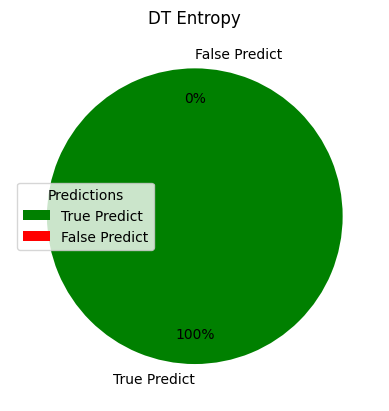

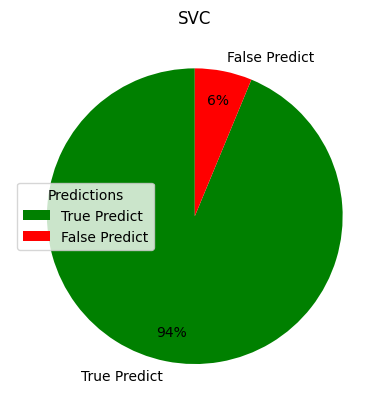

In [190]:
label = ['True Predict', 'False Predict']
x = [acc_entropy, (1 - acc_entropy)]
colors = ("green", "red") 

plt.pie(x, labels=label, colors=colors, autopct='%1.0f%%', pctdistance=0.8, startangle=90,
        textprops=dict(color="black"))

plt.legend(title="Predictions",loc="center left")
plt.title("DT Entropy")
plt.show()

label = ['True Predict', 'False Predict']
x = [acc_svc, (1 - acc_svc)]
colors = ("green", "red") 

plt.pie(x, labels=label, colors=colors, autopct='%1.0f%%', pctdistance=0.8, startangle=90,
        textprops=dict(color="black"))

plt.legend(title="Predictions",loc="center left")
plt.title("SVC")
plt.show()

In [191]:
from sklearn import tree

[Text(0.45588235294117646, 0.9375, 'X[4] <= 0.5\nentropy = 1.022\nsamples = 60\nvalue = [1, 4, 47, 8]'),
 Text(0.3382352941176471, 0.8125, 'X[7] <= 2.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4, 0, 0]'),
 Text(0.27941176470588236, 0.6875, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0]'),
 Text(0.39705882352941174, 0.6875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.5735294117647058, 0.8125, 'X[2] <= 2019.5\nentropy = 0.598\nsamples = 55\nvalue = [0, 0, 47, 8]'),
 Text(0.5147058823529411, 0.6875, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0]'),
 Text(0.6323529411764706, 0.6875, 'X[2] <= 2021.5\nentropy = 0.693\nsamples = 43\nvalue = [0, 0, 35, 8]'),
 Text(0.38235294117647056, 0.5625, 'X[1] <= 2.5\nentropy = 0.84\nsamples = 26\nvalue = [0, 0, 19, 7]'),
 Text(0.23529411764705882, 0.4375, 'X[2] <= 2020.5\nentropy = 0.592\nsamples = 14\nvalue = [0, 0, 12, 2]'),
 Text(0.17647058823529413, 0.3125, 'X[6] <= 0.5\nentropy = 0.811\nsamples = 8\nvalue = [0, 0, 6, 2]'),

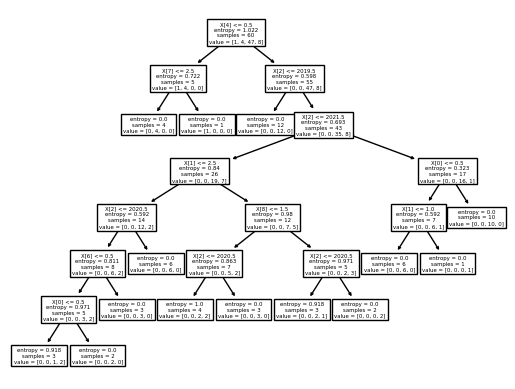

In [195]:
tree.plot_tree(dt_entropy)